# Algorithme du gradient

## Introduction

L'algorithme du gradient permet de minimiser une fonction définie sur un espace de Hilbert.
Au point courant, un déplacement est effectué dans la direction opposée au gradient (direction de plus grande pente), de manière à faire décroître la fonction.

## Formulation mathématique

Soient $ \mathbb{H} $ un espace hilbertien (produit scalaire noté $ \langle \cdot , \cdot \rangle $ et norme associée notée $ \| \cdot \| $) et  
$$
x \in \mathbb{H} \mapsto f(x) \in \mathbb{R}
$$
une fonction différentiable.  

On note $ \mathrm{d}f(x) $ la différentielle de $ f $ en $ x $ et $ \nabla f(x) $ le gradient de $ f $ en $ x $, si bien que pour toute direction $ d \in \mathbb{E} $,  

$$
\mathrm{d}f(x)(d) = \langle \nabla f(x), d \rangle.
$$

---

### Algorithme

**Données :**
- un point initial $x_0 \in \mathbb{H}$,  
- une tolérance $\varepsilon \geqslant 0$,  
- un pas de descente fixe $ \alpha > 0 $.

**Objectif :** minimiser $f$ sur $\mathbb{H}$.

---

### Étapes de l’algorithme

Pour $k = 0, 1, 2, \dots$ :

1. **Calcul du gradient**  
   Évaluer le gradient au point courant :
   $$
   g_k = \nabla f(x_k).
   $$

2. **Critère d’arrêt** (plusieurs sont possible )

   
   Si
   $$
   \| g_k \| \leqslant \varepsilon,
   $$
   alors **arrêter** : $x_k$ est considéré comme un point stationnaire.

4. **Mise à jour de l’itéré**  
   Mettre à jour selon la direction de plus forte descente :
   $$
   x_{k+1} = x_k - \alpha g_k.
   $$

### Définition

Soit $H$ un espace hilbertien et $J : H \to \mathbb{R}$ une fonction.  
On dit que $J$ est **$\alpha$-convexe** (ou **fortement convexe de paramètre $\alpha > 0$**)  
si, pour tous $u, v \in H$, on a :

$$
J\!\left(\frac{u + v}{2}\right)
\le \frac{J(u) + J(v)}{2}
- \frac{\alpha}{8}\, \|u - v\|^2.
$$

### Proposition — Caractérisation de l'$\alpha$-convexité par le gradient



Soit $J : H \to \mathbb{R}$ une fonction différentiable.  

Alors $J$ est **$\alpha$-convexe** si et seulement si, pour tous $u,v \in H$ :

$$
\langle J'(u) - J'(v), \, u - v \rangle \ge \alpha \, \|u - v\|^2.
$$



### Proposition


Soit $J : H \to \mathbb{R}$ une fonction **$\alpha$-convexe** et **différentiable**,  
et supposons que son gradient $J'$ soit **Lipschitzien** sur $H$,  
c’est-à-dire qu’il existe une constante $C > 0$ telle que :

$$
\| J'(u) - J'(v) \| \leq C \, \| u - v \|, 
\quad \forall u, v \in H.
$$

On considère l’algorithme du gradient à pas fixe :

$$
u_{n+1} = u_n - \mu \, J'(u_n),
$$

où $ \mu > 0 $ est le **pas d’apprentissage** (*learning rate*).


Si le pas $ \mu $ satisfait :

$$
0 < \mu < \frac{2\alpha}{C^2},
$$

alors la suite $(u_n)$ **converge vers le minimum de $J$**,  
et ce **quel que soit le point initial** $u_0 \in H$.

### Preuve

   Par $\alpha$-convexité de $J$, pour tout $u\in H$ :

   $$
   \langle J'(u), u - u^\ast \rangle \ge \alpha \, \|u - u^\ast\|^2,
   $$

   où $u^\ast = \arg\min J$.  

   En utilisant l’inégalité de Cauchy-Schwarz :

   $$
   \|J'(u)\| \cdot \|u - u^\ast\| \ge \langle J'(u), u - u^\ast \rangle \ge \alpha \, \|u - u^\ast\|^2.
   $$

   Donc, pour tout $n$ :

   $$
   \|J'(u_n)\| \ge \alpha \, \|u_n - u^\ast\|.
   $$

---

   Nous avons alors:

   $$
   \|u_{n+1} - u^\ast\|^2 = \|u_n - \mu J'(u_n) - u^\ast\|^2
   = \|u_n - u^\ast\|^2 - 2 \mu \langle J'(u_n), u_n - u^\ast \rangle + \mu^2 \|J'(u_n)\|^2.
   $$

   En utilisant $\langle J'(u_n), u_n - u^\ast \rangle \ge \alpha \|u_n - u^\ast\|^2$ et $\|J'(u_n)\|^2 \le C^2 \|u_n - u^\ast\|^2$ (par Lipschitz du gradient), on obtient :

   $$
   \|u_{n+1} - u^\ast\|^2 \le \left( 1 - 2 \alpha \mu + C^2 \mu^2 \right) \|u_n - u^\ast\|^2.
   $$

   L'inégalité $0 < \mu < \frac{2\alpha}{C^2}$ garantit alors que le coefficient est strictement inférieur à 1.  

---


   Ainsi, la suite $(u_n)$ converge vers $u^\ast$, le minimum unique de $J$ :

   $$
   \|u_n - u^\ast\| \to 0 \quad \text{quand } n \to \infty.
   $$













## Implémentation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [6]:
def gradient_descent (x0, learning_rate, grad_f, iter_max, tol):

    # x0 : point de départ
    # learning_rate : pas de la descente
    # grad_f : gradient ou dérivée de f (selon la dimension de. l'espace de départ)
    # iter_max : nombre d'itération maximal
    # tol : tolérance au bout de laquelle on considére qu'il y a convergence
    
    k=1
    X = [x0]
    x_prev = x0
    x_next = x_prev - learning_rate * grad_f(x_prev)
    X.append(x_next)
    
    while k < iter_max and np.linalg.norm(x_next-x_prev) > tol:
        
        x_prev = x_next
        x_next =x_prev - learning_rate * grad_f(x_prev)
        X.append(x_next)
        k=k+1
    return x_next, k, X

        
    

In [7]:
# Application

f = lambda x : x**2
grad_f = lambda x: 2*x

x_min, n_iter, X= gradient_descent(10.0, 0.1, grad_f, iter_max=100, tol=1e-6)
print(f"Minimum trouvé : {x_min}, en {n_iter} itérations")



Minimum trouvé : 3.213876088517982e-06, en 67 itérations


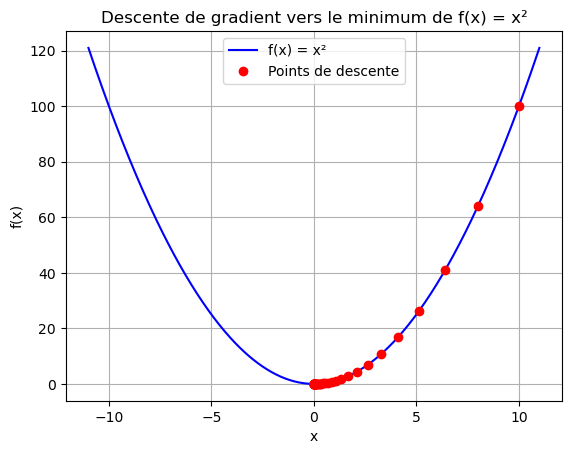

In [9]:
# Générer la courbe de f(x) = x^2
x_vals = np.linspace(-11, 11, 400)
y_vals = f(x_vals)

# Obtenir les points de la descente
x_points = np.array(X)
y_points = f(x_points)

# Tracer la courbe f(x)
plt.plot(x_vals, y_vals, label='f(x) = x²', color='blue')

# Tracer les points de descente
plt.plot(x_points, y_points, 'ro', label='Points de descente')

# Affichage
plt.title("Descente de gradient vers le minimum de f(x) = x²")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

Minimum trouvé : [3.92318858e-06 3.16701433e-14], en 63 itérations


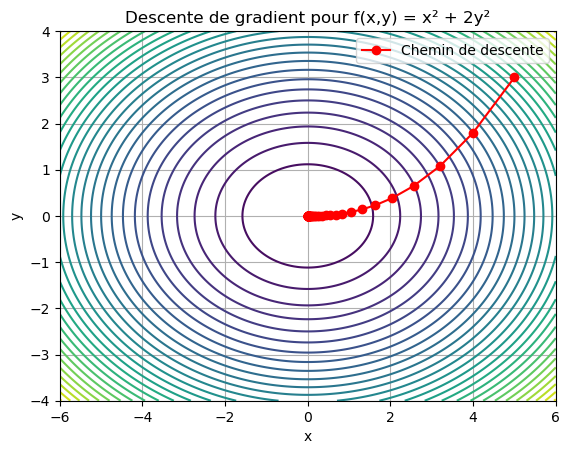

In [10]:
# Fonction et gradient
f = lambda X: X[0]**2 + 2*X[1]**2
grad_f = lambda X: np.array([2*X[0], 4*X[1]])

# Point initial
x0 = np.array([5.0, 3.0])

# Descente de gradient
x_min, n_iter, X = gradient_descent(x0, 0.1, grad_f, iter_max=100, tol=1e-6)
print(f"Minimum trouvé : {x_min}, en {n_iter} itérations")

# Convertir X en array pour tracer
X_array = np.array(X)

# Tracé du contour de f
x_vals = np.linspace(-6, 6, 200)
y_vals = np.linspace(-4, 4, 200)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = X_grid**2 + 2*Y_grid**2

plt.contour(X_grid, Y_grid, Z, levels=30, cmap='viridis')
plt.plot(X_array[:,0], X_array[:,1], 'ro-', label='Chemin de descente')
plt.title("Descente de gradient pour f(x,y) = x² + 2y²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()